# <center>**NDVI-Based Land Cover Classification**</center>

## Key Concepts

1. **NDVI (Normalized Difference Vegetation Index):**
Measures vegetation health using satellite data

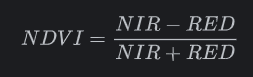

Where:

- NIR = Near-Infrared reflectance
- Red = Red reflectance


2. **Data Challenges**
   
- **Noise:** The main challenge with the dataset is that both the imagery and the crowdsourced data contain noise (due to cloud cover in the images and inaccurate labeling/digitizing of polygons).

- **Missing Data:** Certain NDVI values are missing because of cloud cover obstructing the satellite view.

- **Temporal Variations:** NDVI values vary seasonally, requiring careful feature engineering to extract meaningful trends.

## About the Data

Each row in the dataset contains:

- **class:** Ground truth label of the land cover type — one of {Water, Impervious, Farm, Forest, Grass, Orchard}

- **ID:** Unique identifier for the sample

- **27 NDVI Time Points:** Columns labeled in the format YYYYMMDD_N (e.g., 20150720_N, 20150602_N) represent NDVI values collected on different dates. These values form a time series representing vegetation dynamics for each location

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv
/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv


Importing the training dataset:

In [2]:
df = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv")
df #ignore the warnings

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.880,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.950,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10537,10538,impervious,1207.7000,984.620,NaN,1166.25,937.478,1072.700,823.896,...,1117.740,1176.600,1044.110,NaN,369.082,465.843,362.882,979.795,NaN,433.659
7996,10538,10539,impervious,2170.3500,1419.720,1361.000,1478.71,983.911,1262.110,1422.860,...,984.634,2128.970,1379.660,NaN,762.633,485.204,446.724,771.747,1589.06,506.936
7997,10541,10542,impervious,1895.6800,1454.740,NaN,1033.56,1930.380,1057.150,1471.600,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.000,1818.650,2501.72,1247.770
7998,10542,10543,impervious,3465.7400,1283.320,413.412,4391.05,1146.820,4473.050,1614.750,...,5833.760,4047.320,4515.800,433.177,277.296,744.143,NaN,3759.710,NaN,388.346


In [3]:
df.columns

Index(['Unnamed: 0', 'ID', 'class', '20150720_N', '20150602_N', '20150517_N',
       '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N',
       '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N',
       '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N',
       '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N',
       '20140218_N', '20140202_N', '20140117_N', '20140101_N'],
      dtype='object')

In [4]:
df.shape

(8000, 30)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8000 non-null   int64  
 1   ID          8000 non-null   int64  
 2   class       8000 non-null   object 
 3   20150720_N  7440 non-null   float64
 4   20150602_N  6800 non-null   float64
 5   20150517_N  7200 non-null   float64
 6   20150501_N  7040 non-null   float64
 7   20150415_N  7520 non-null   float64
 8   20150330_N  6880 non-null   float64
 9   20150314_N  7280 non-null   float64
 10  20150226_N  6640 non-null   float64
 11  20150210_N  7360 non-null   float64
 12  20150125_N  6960 non-null   float64
 13  20150109_N  7120 non-null   float64
 14  20141117_N  6720 non-null   float64
 15  20141101_N  7600 non-null   float64
 16  20141016_N  6560 non-null   float64
 17  20140930_N  7200 non-null   float64
 18  20140813_N  7440 non-null   float64
 19  20140626_N  6400 non-null  

In [6]:
df.describe()

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
count,8000.000000,8000.000000,7440.000000,6800.000000,7200.000000,7040.000000,7520.000000,6880.000000,7280.000000,6640.000000,...,7520.000000,7280.000000,7120.000000,6240.000000,7360.000000,6880.000000,6560.000000,7440.000000,6800.000000,7600.000000
mean,4984.202625,4985.202625,5845.476916,4868.091395,4469.837748,5193.485086,2927.586705,4924.493648,3313.881373,4987.520158,...,4872.681670,3674.886731,3012.178524,3055.167358,2041.316792,2799.820342,2144.360224,6259.064275,2629.203972,2578.449870
std,2900.022898,2900.022898,2261.409128,2758.499942,2876.218394,2510.389832,2728.325670,2600.418802,2434.828743,2674.963286,...,2776.135418,2331.105635,2068.334108,2209.985887,2040.354512,2452.563243,2267.606759,1825.563702,2386.147667,2436.270797
min,0.000000,1.000000,-433.735000,-1781.790000,-2939.740000,-1924.360000,-1794.870000,-1848.910000,-1574.970000,-2532.490000,...,-2683.600000,-1043.160000,-2435.900000,-1505.780000,-1445.370000,55.564100,-232.292000,-2729.430000,-2139.860000,-4145.250000
25%,2514.750000,2515.750000,4331.232500,2067.265000,1521.195000,3087.072500,500.515750,2398.385000,992.778250,2404.075000,...,2010.732500,1369.355000,1368.742500,1009.827500,419.987000,791.741250,501.602750,5938.257500,691.171500,689.199000
50%,4917.500000,4918.500000,6908.255000,5513.375000,4672.000000,5810.755000,1586.240000,5742.485000,2802.010000,5831.120000,...,5484.905000,3659.770000,2633.695000,2624.125000,1183.715000,1599.385000,969.711500,6941.010000,1521.210000,1439.950000
75%,7311.250000,7312.250000,7626.845000,7555.570000,7431.697500,7511.880000,5703.067500,7280.110000,5508.350000,7430.915000,...,7607.755000,5927.035000,4128.082500,4952.317500,3075.997500,4909.997500,3227.380000,7395.612500,4452.257500,4146.342500
max,10544.000000,10545.000000,8376.150000,8566.420000,8650.500000,8516.100000,8267.120000,8499.330000,8001.700000,8452.380000,...,8489.970000,7981.820000,8445.410000,7762.980000,8078.080000,8216.700000,8247.630000,8410.330000,8418.230000,8502.020000


In [7]:
df.isnull().sum().sum()

25040

## Data Visualization

Text(0, 0.5, 'Land Cover Class')

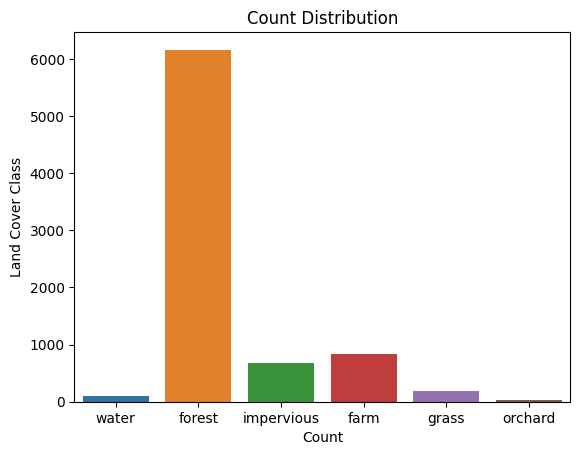

In [8]:
sns.countplot(data=df, x='class')
plt.title('Count Distribution')
plt.xlabel("Count")
plt.ylabel("Land Cover Class")

Text(0, 0.5, 'NDVI')

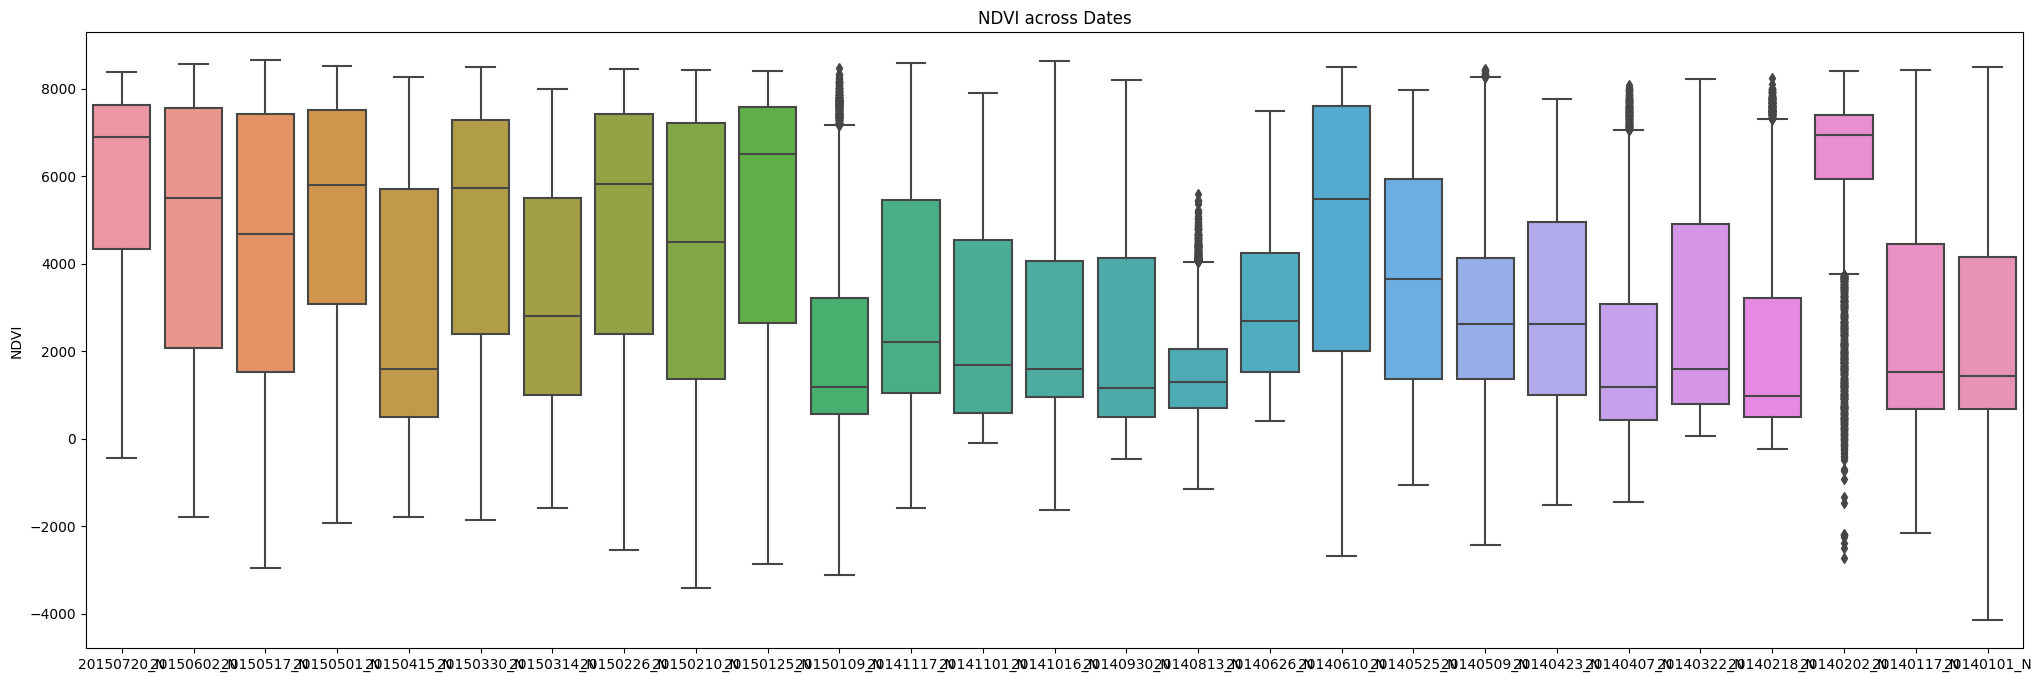

In [9]:
plt.figure(figsize=(25,8))
sns.boxplot(df.drop(columns=['Unnamed: 0', 'ID', 'class']))
plt.title('NDVI across Dates')
plt.ylabel('NDVI')

Text(0.5, 1.0, 'Correlation Heatmap of NDVI Time Points')

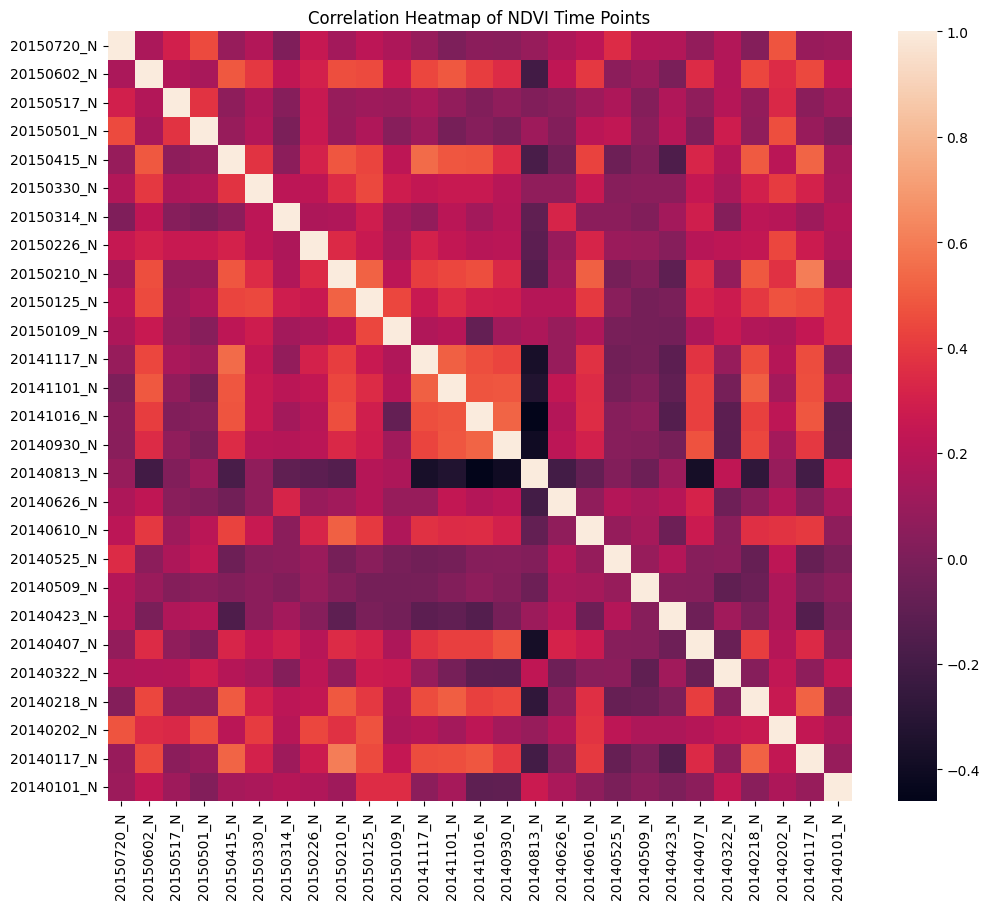

In [10]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.drop(columns=['Unnamed: 0', 'ID', 'class']).corr())
plt.title('Correlation Heatmap of NDVI Time Points')

## Model Building

Importing relevant libraries:

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score

Splitting into features and target

In [12]:
X = df.drop(columns=['Unnamed: 0', 'ID', 'class'])
y = df['class']

### Data Pre-Processing

Using Simple Imputer as less than 20% data is missing (11.6%)

In [13]:
impute = SimpleImputer(strategy = 'mean')
X_imputed = impute.fit_transform(X)

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

For target variable:

In [15]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

### Train-Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded,
                                                    test_size=0.2, random_state=42, stratify=y_encoded)

### Model Fitting

In [17]:
model = LogisticRegression(
    class_weight='balanced', 
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state = 42
)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000,
                   multi_class='multinomial', random_state=42)

### Model Prediction

In [18]:
y_pred = model.predict(X_test)

#### Classification Report

In [19]:
print(classification_report(
    y_test,
    y_pred,
    labels=list(range(len(label_encoder.classes_))),
    target_names=label_encoder.classes_
))

              precision    recall  f1-score   support

        farm       0.43      0.60      0.50       168
      forest       0.96      0.69      0.81      1232
       grass       0.15      0.64      0.25        39
  impervious       0.72      0.74      0.73       134
     orchard       0.05      0.83      0.09         6
       water       0.21      0.71      0.33        21

    accuracy                           0.69      1600
   macro avg       0.42      0.70      0.45      1600
weighted avg       0.85      0.69      0.75      1600



#### Accuracy Score

In [20]:
accuracy_score(y_test, y_pred)

0.688125

## Predicting for Test Data

Importing test dataset:

In [21]:
test_df = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv")
test_df.shape

(2845, 29)

Dropping index columns again:

In [22]:
ID = test_df['ID']

In [23]:
X_test = test_df.drop(columns = ['Unnamed: 0', 'ID'])

Pre-processing test data:

In [24]:
X_test_imputed = impute.fit_transform(X_test)
X_test_scaled = scaler.fit_transform(X_test_imputed)

In [25]:
y_test_df = model.predict(X_test_scaled)

In [26]:
y_test

array([1, 1, 3, ..., 1, 1, 1])

In [27]:
y_decoded = label_encoder.inverse_transform(y_test_df)
y_decoded

array(['orchard', 'orchard', 'orchard', ..., 'water', 'water',
       'impervious'], dtype=object)

In [28]:
result = pd.DataFrame({
    'ID': ID,
    'class': y_decoded
})

In [29]:
result

,ID,class
0,1,orchard
1,2,orchard
2,3,orchard
3,4,orchard
4,5,orchard
...,...,...
2840,2841,water
2841,2842,impervious
2842,2843,water
2843,2844,water


In [30]:
result.to_csv("submission.csv", index=False) #this file will appear under the output section of the right navbar. You need to submit this csv file